<a href="https://colab.research.google.com/github/Debora96/ArticleXAI/blob/main/Figures_4%2C_5_e_1S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# load the dataset
from google.colab import files

uploaded = files.upload()

Saving LUSC_ALL.csv to LUSC_ALL.csv


In [2]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['LUSC_ALL.csv']))
print(df)

    neoplasm metastasis ajcc.stage  obs.time  status   age  gender  prior.dx  \
0         N1         M0        T2b       455       1  62.0       1         0   
1         N0         M0        T1b       247       0  56.0       1         0   
2         N0         MX        T1b       378       0  74.0       1         0   
3         N0         M0        T2b       544       1  76.0       1         1   
4         N0         M0        T2a        55       0  68.0       1         0   
..       ...        ...        ...       ...     ...   ...     ...       ...   
488       N1        NaN         T4        12       1  65.0       1         0   
489       NX         M0        T1a       910       0  60.0       0         0   
490       N1         MX        T2a        82       0  45.0       0         0   
491       N1         M1         T4       716       1  73.0       1         0   
492       N1         M0         T2       358       1  56.0       1         0   

          GCLC     WNT16  ...  LINC0166

In [3]:
rotulos_unicos = df['ajcc.stage'].unique()

# Imprimindo os rótulos únicos
print(rotulos_unicos)

['T2b' 'T1b' 'T2a' 'T2' 'T1' 'T1a' 'T3' 'T4']


In [4]:
mapeamento = {'T1': 0, 'T1a': 0,'T1b':0,'T2':0,'T2a':0,'T2b':0,'T3':1,'T4':1}

# Substituir os rótulos 'T1' e 'T1a' pelo rótulo '1'
df['ajcc.stage'] = df['ajcc.stage'].replace(mapeamento)

<ipython-input-4-de37a9439484>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ajcc.stage'] = df['ajcc.stage'].replace(mapeamento)


In [5]:
df.head()

,neoplasm,metastasis,ajcc.stage,obs.time,status,age,gender,prior.dx,GCLC,WNT16,...,LINC01667,CH507.42P11.6,KCNIP4.IT1,SH3PXD2A.AS1,PCAT5,LINC01202,ELDR,SCHLAP1,LINC00891,PAUPAR
0,N1,M0,0,455,1,62.0,1,0,13.535154,5.857981,...,2.321928,2.000000,1.584963,8.764872,0.0,3.000000,0.0,3.700440,2.807355,1.0
1,N0,M0,0,247,0,56.0,1,0,12.279320,2.321928,...,4.459432,2.321928,0.000000,3.169925,1.0,4.000000,0.0,0.000000,2.584963,0.0
2,N0,MX,0,378,0,74.0,1,0,12.867279,5.954196,...,5.129283,2.321928,1.000000,7.930737,1.0,1.000000,3.0,3.807355,4.169925,0.0
3,N0,M0,0,544,1,76.0,1,1,10.674192,6.375039,...,0.000000,0.000000,1.000000,7.383704,0.0,1.584963,1.0,5.169925,2.807355,0.0
4,N0,M0,0,55,0,68.0,1,0,10.673309,6.087463,...,0.000000,4.169925,1.000000,6.672425,0.0,3.459432,0.0,0.000000,3.700440,0.0


In [6]:
contagem_por_classe = df['ajcc.stage'].value_counts()

# Exibir a contagem por classe
print(contagem_por_classe)

ajcc.stage
0    400
1     93
Name: count, dtype: int64


In [7]:
Genes_all = ["ALDH3B1","ALG1L","APC","C7","CAV1","CENPI","CST1","EPHA6","FAM83A","FOSB","GABRP","GJB6","GKN2","GPRC5A","GTSF1","H2AC14","IRS1","KREMEN2","LARGE2","LINC00887","LINC01910","LINC02605","LY6D","MAGEA10","MAGI2","MMP20","PCAT7","PITX2","TLX3","TNS4","WSCD2",

"LINC00640","KRT17P1","GSDMC","EIF4G1","FOXG1","H2BC9","HMGB3P6","CSTL1","ATF7IP","RNF222","EGF","GCGR","KRT75","TMPRSS11D","SBSN","VIL1","BMP7","TFAP2A","PLXNB3","CDT1","COL9A3","TMPRSS4","LINC02830","DSEL","NLGN1","GNG4","SLC9A2",

"IL6","PPFIA4","CACNA1I","CDKN2A","PLAAT1","C14orf39","LINC01549","ONECUT3","PRSS3","IMPDH1P8","KIAA0895LP1","RCOR2","FAM72C","RAD51AP2","SMC1B","FTCD","PPP1R27","GINS2","WNK2","COL4A3","ESCO2","SH2D5","AQP1","MYOSLID","PDE10A","DUXAP9","NLRP10","VCAN","NUS1P2"]

In [8]:
df_all = df[Genes_all]
print(df_all)

       ALDH3B1      ALG1L        APC         C7       CAV1     CENPI  \
0     8.971544   9.209453  10.596190   8.851749  11.576957  9.231221   
1     9.807355   9.219169   7.584963   5.807355   9.807355  7.965784   
2    10.500842   8.703904  10.844706  11.872675  12.721313  8.867279   
3     9.556506   8.558421   9.008429  14.112847  13.756244  7.912889   
4     9.375039   9.566054  10.011227  11.294046  13.635718  6.108524   
..         ...        ...        ...        ...        ...       ...   
488   7.982994  10.807355  10.997885   9.355351  10.793603  8.870365   
489  10.556506   3.584963   9.813781  10.821774  12.286847  6.539159   
490   9.388017  10.019591  10.882643  11.859146  13.428491  9.368506   
491   9.219169  10.767357   9.957102   9.400879  14.595316  8.734710   
492   9.211888  11.801304   9.696968  10.278449  10.388017  8.447083   

          CST1     EPHA6     FAM83A       FOSB  ...    COL4A3      ESCO2  \
0     9.002815  3.000000  11.292897   8.413628  ...  6.9425

In [9]:
data = pd.DataFrame(df)


#Preparing input and output variables
X = df_all
y = data[data.columns[2:3]]

In [10]:
print(y)

     ajcc.stage
0             0
1             0
2             0
3             0
4             0
..          ...
488           1
489           0
490           0
491           1
492           0

[493 rows x 1 columns]


**SOBREVIDA DOS GRUPOS**

In [11]:
import pandas as pd

# Renomear múltiplas colunas
df = df.rename(columns={'ajcc.stage': 'stage', 'obs.time': 'time'})

In [12]:
!pip install lifelines


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=0237cb4450d25b54e0673af22d6d7a464778a90d990f5578521fba0690924c10
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


**Suplementary Figure 1**

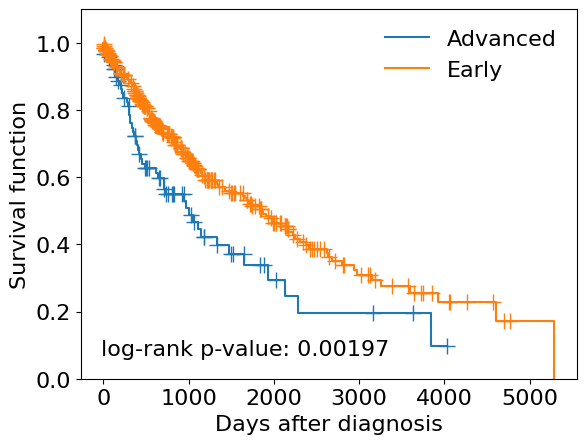

In [13]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from lifelines.statistics import logrank_test
from lifelines import KaplanMeierFitter

matplotlib.rcParams.update({'font.size': 16, "legend.frameon": False})

dataset = df

E = (dataset.status == 1)
T = dataset.time
group1 = (dataset.stage == 1)
label1 = "Advanced"
group2 = (dataset.stage == 0)
label2 = "Early"

def km_and_logrank(group1, group2, T, E, label1, label2):
    """
    group1: booleans identificando o grupo 1
    group2: booleans identificando o grupo 2
    T: pd.Series identificando o tempo da análise de sobrevivência
    E: pd.Series identificando o evento (censurado ou evento) da análise de sobrevivência
    label1: nome do grupo 1
    label2: nome do grupo 2
    """
    T1=T[group1]
    E1=E[group1]

    T2=T[group2]
    E2=E[group2]

    #logrank_test
    results=logrank_test(T1,T2,event_observed_A=E1, event_observed_B=E2)

    #Kaplan Meier plot
    kmf = KaplanMeierFitter()

    ax = plt.subplot(111)
    ax = kmf.fit(T1, E1, label=f"{label1}").plot(ax=ax, ci_show=False, show_censors=True)
    ax = kmf.fit(T2, E2, label=f"{label2}").plot(ax=ax, ci_show=False, show_censors=True)
    ax.set_xlabel('Days after diagnosis')
    ax.set_ylabel('Survival function')
    plt.ylim([0, 1.1])
    anchored_text = AnchoredText("log-rank p-value: {:.3}".format(results.p_value), loc=3, frameon=False)
    ax.add_artist(anchored_text)

      # Salva o gráfico em formato SVG
    plt.savefig("kaplan_meier_plot.svg", format='svg')
    plt.show()


km_and_logrank(group1, group2, T, E, label1, label2)



**UPSETS PLOTS**

RF (GKN2, C7, DSEL, IMPDH1P8, MYOSLID, COL9A3, GCGR, NLGN1, NUS1P2, VIL1
H2AC14, MMP20, CACNA1I, KIAA0895LP1, HMGB3P6, LINC02830, ALDH3B1, AQP1, PRSS3, PLAAT1)

XGB (GKN2, H2AC14, MYOSLID, IMPDH1P8, COL9A3, GABRP, MMP20, C7, DUXAP9, PCAT7, PLAT1, GCGR, ALDH3B1, FOSB, ALG1L, DSEL, PPP1R27, COL4A3, GSDMC, TNS4)

CAT (H2AC14, GKN2, MYOSLID, COL9A3, MMP20, GABRP, IMPDH1P8, PLAAT1, NUS1P2, LINC01910, KIAA0895LP1, DSEL, HMGB3P6, COL4A3, BMP7, ALDH3B1, ONECUT3, ESCO2, DUXAP9, PPP1R27)

RF_RFE (GKN2, COL9A3, PCAT7, H2AC14, MMP20, C7, ALG1L, LINC00887, MYOSLID, PLAAT1, ESCO2, GCGR, GINS2, HMGB3P6, GSDMC, IMPDH1P8, CSTL1, FTCD, ONECUT3, ALDH3B1)

XGB_RFE (H2AC14, GKN2, COL9A3, MMP20, PLXNB3, IMPDH1P8, PCAT7, MYOSLID, ONECUT3, LINC0887, GCGR, GINS2, FTCD, ALDH3B1, PPP1R27, TNS4, PLAAT1, CAV1, GSDMC, C7)

CAT_RFE (H2AC14, GKN2, MMP20, COL9A3, MYOSLID, LINC00887, PCAT7, C7, IMPDH1P8, PLAAT1, ALDH3B1, PLXNB3, FTCD, GCGR, CSTL1, HMGB3P6, GSDMC, ALG1L, ONECUT3, PPP1R27)

RF_CV1 (COL9A3, IMPDH1P8, GABRP, ESCO2, GNK2, NUS1P2, PCAT7, H2AC14, MAGI2, C7, MYOSLID, ALDH3B1, HMGB3P6, DSEL, KIAA08095LP1, AQP1, GCGR, PLAAT1, LINC01910, MMP20)

RF_CV2 (COL9A3, IMPDH1P8, MMP20, GABRP, GKN2, TMPRSS4, NUS1P2, GSDMC, GCGR, HMGB3P6, KIAA0895LP1, ESCO2, LINC02830, MAGI2, AQP1, FOXG1, MYOSLID, C7, ATF7IP, CSTL1)

RF_CV3 (COL9A3, IMPDH1P8, MMP20, GKN2, KIAA08095LP1, NUS1P2, GABRP, PLAAT1, ESCO2, C7, H2AC14, FAM72C, CDT1, HMGB3P6, MAGI2, GINS2, GSDMC, WSCD2, FTCD, MYOSLID)

RF_CV4 (IMPDH1P8, GKN2, COL9A3, MYOSLID, ESCO2, GABRP, LINC01910, NUS1P2, H2AC14, TMPRSS4, KIAA0895LP1, GSDMC, MAGI2, PRSS3, MMP20, C7, GCGR, DSEL, ALDH3B1, PLXNB3)

RF_CV5 (COL9A3, GKN2, IMPDH1P8, NUS1P2, GABRP, MYOSLID, PLAAT1, CSTL1, GCGR, ESCO2, H2AC14, LINC02830, C7, COL4A3, DUXAP9, CACNA1I, AQP1, HMGB3P6, NLGN1, PCAT7)

RF_RFE_CV1 (COL9A3, GKN2, HGMB3P6, H2AC14, C7, ESCO2, MMP20, IMPDH1P8, LINC02830, PCAT7, ALDH3B1, ONECUT3, PLAAT1, CSTL1, ALG1L, GCGR, MYOSLID, GSDMC, GINS2, LINC00887)

RF_RFE_CV2 (GKN2, COL9A3, C7, H2AC14, LINC02830, MMP20, GSDMC, ESCO2, CSTL1, ALG1L, PCAT7, HMGB3P6, GINS2, IMPDH1P8, PLAAT1, MYOSLID, GCGR, LINC00887, TMPRSS4, ONECUT3)

RF_RFE_CV3 (GKN2, COL9A3, HMGB3P6, ALG1L, C7, MMP20, GINS2, PLAAT1, LINC02830, CSTL1, IMPDH1P8, H2AC14, LINC00887, ESCO2, MYOSLID, PCAT7, ONECUT3, FTCD, ALDH3B1, GSDMC)

RF_RFE_CV4 (COL9A3, GKN2, ESCO2, C7, H2AC14, MMP20, ALG1L, IMPDH1P8, GINS2, CSTL1, PLAAT1, FTCD, ONECUT3, GSDMC, HMGB3P6, PCAT7, MYOSLID, LINC02830, TMPRSS4, CACNA1I)

RF_RFE_CV5 (COL9A3, GKN2, MMP20, C7, LINC02830, ALG1L, CSTL1, PCAT7, H2AC14, PLAAT1, IMPDH1P8, GCGR, TMPRSS4, ONECUT3, MYOSLID, LINC00887, HMGB3P6, ESCO2, GINS2, DUXAP9)

In [14]:
pip install matplotlib-venn


In [15]:
!pip install upsetplot


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for upsetplot: filename=upsetplot-0.9.0-py3-none-any.whl size=24832 sha256=13e3f001c93b2943463ddf45cfc3454459f9f1e33437f779fa9ccbbea270ad66
  Stored in directory: /root/.cache/pip/wheels/7b/ce/88/1d0bce5b2680165c29c3e68416325e79674d5a9f422d037996
Successfully built upsetplot


**Figure 4**

Genes presentes em todos os 5 grupos: ['MYOSLID', 'GINS2', 'HMGB3P6', 'ALG1L', 'PLAAT1', 'PCAT7', 'LINC02830', 'ESCO2', 'H2AC14', 'CSTL1', 'COL9A3', 'C7', 'MMP20', 'GKN2', 'IMPDH1P8', 'ONECUT3']


/usr/local/lib/python3.11/dist-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/usr/local/lib/python3.11/dist-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

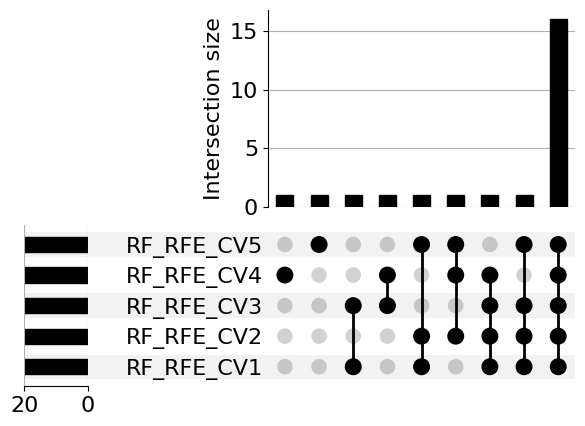

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import upsetplot

# Definindo cinco conjuntos de genes como listas (ou conjuntos)
genes_grupo1 = {'COL9A3', 'GKN2', 'HMGB3P6', 'H2AC14', 'C7', 'ESCO2', 'MMP20', 'IMPDH1P8', 'LINC02830', 'PCAT7', 'ALDH3B1', 'ONECUT3', 'PLAAT1', 'CSTL1', 'ALG1L', 'GCGR', 'MYOSLID', 'GSDMC', 'GINS2', 'LINC00887'}
genes_grupo2 = {'GKN2', 'COL9A3', 'C7', 'H2AC14', 'LINC02830', 'MMP20', 'GSDMC', 'ESCO2', 'CSTL1', 'ALG1L', 'PCAT7', 'HMGB3P6', 'GINS2', 'IMPDH1P8', 'PLAAT1', 'MYOSLID', 'GCGR', 'LINC00887', 'TMPRSS4', 'ONECUT3'}
genes_grupo3 = {'GKN2', 'COL9A3', 'HMGB3P6', 'ALG1L', 'C7', 'MMP20', 'GINS2', 'PLAAT1', 'LINC02830', 'CSTL1', 'IMPDH1P8', 'H2AC14', 'LINC00887', 'ESCO2', 'MYOSLID', 'PCAT7', 'ONECUT3', 'FTCD', 'ALDH3B1', 'GSDMC'}
genes_grupo4 = {'COL9A3', 'GKN2', 'ESCO2', 'C7', 'H2AC14', 'MMP20', 'ALG1L', 'IMPDH1P8', 'GINS2', 'CSTL1', 'PLAAT1', 'FTCD', 'ONECUT3', 'GSDMC', 'HMGB3P6', 'PCAT7', 'MYOSLID', 'LINC02830', 'TMPRSS4', 'CACNA1I'}
genes_grupo5 = {'COL9A3', 'GKN2', 'MMP20', 'C7', 'LINC02830', 'ALG1L', 'CSTL1', 'PCAT7', 'H2AC14', 'PLAAT1', 'IMPDH1P8', 'GCGR', 'TMPRSS4', 'ONECUT3', 'MYOSLID', 'LINC00887', 'HMGB3P6', 'ESCO2', 'GINS2', 'DUXAP9'}


# Criando um DataFrame para armazenar os genes e suas presenças nos grupos
todos_genes = list(genes_grupo1 | genes_grupo2 | genes_grupo3 | genes_grupo4 | genes_grupo5)
tabela = pd.DataFrame(index=todos_genes)
tabela['RF_RFE_CV1'] = tabela.index.isin(genes_grupo1)
tabela['RF_RFE_CV2'] = tabela.index.isin(genes_grupo2)
tabela['RF_RFE_CV3'] = tabela.index.isin(genes_grupo3)
tabela['RF_RFE_CV4'] = tabela.index.isin(genes_grupo4)
tabela['RF_RFE_CV5'] = tabela.index.isin(genes_grupo5)

# Encontrando a interseção entre os cinco grupos
genes_interseção_5_grupos = tabela[(tabela['RF_RFE_CV1']) &
                                   (tabela['RF_RFE_CV2']) &
                                   (tabela['RF_RFE_CV3']) &
                                   (tabela['RF_RFE_CV4']) &
                                   (tabela['RF_RFE_CV5'])].index.tolist()

print("Genes presentes em todos os 5 grupos:", genes_interseção_5_grupos)

# Contando as interseções para o UpSet plot
combinações = tabela.groupby(['RF_RFE_CV1', 'RF_RFE_CV2', 'RF_RFE_CV3', 'RF_RFE_CV4', 'RF_RFE_CV5']).size()

# Plotando o UpSet plot
upsetplot.plot(combinações, orientation='horizontal')
#plt.title("Five Random Forest Folds")
plt.savefig("upset_plot.svg", format='svg', dpi=300)

plt.show()




In [17]:
# Conjuntos dos grupos
genes_grupo1 = {'COL9A3', 'GKN2', 'HMGB3P6', 'H2AC14', 'C7', 'ESCO2', 'MMP20', 'IMPDH1P8', 'LINC02830', 'PCAT7', 'ALDH3B1', 'ONECUT3', 'PLAAT1', 'CSTL1', 'ALG1L', 'GCGR', 'MYOSLID', 'GSDMC', 'GINS2', 'LINC00887'}
genes_grupo2 = {'GKN2', 'COL9A3', 'C7', 'H2AC14', 'LINC02830', 'MMP20', 'GSDMC', 'ESCO2', 'CSTL1', 'ALG1L', 'PCAT7', 'HMGB3P6', 'GINS2', 'IMPDH1P8', 'PLAAT1', 'MYOSLID', 'GCGR', 'LINC00887', 'TMPRSS4', 'ONECUT3'}
genes_grupo3 = {'GKN2', 'COL9A3', 'HMGB3P6', 'ALG1L', 'C7', 'MMP20', 'GINS2', 'PLAAT1', 'LINC02830', 'CSTL1', 'IMPDH1P8', 'H2AC14', 'LINC00887', 'ESCO2', 'MYOSLID', 'PCAT7', 'ONECUT3', 'FTCD', 'ALDH3B1', 'GSDMC'}
genes_grupo4 = {'COL9A3', 'GKN2', 'ESCO2', 'C7', 'H2AC14', 'MMP20', 'ALG1L', 'IMPDH1P8', 'GINS2', 'CSTL1', 'PLAAT1', 'FTCD', 'ONECUT3', 'GSDMC', 'HMGB3P6', 'PCAT7', 'MYOSLID', 'LINC02830', 'TMPRSS4', 'CACNA1I'}
genes_grupo5 = {'COL9A3', 'GKN2', 'MMP20', 'C7', 'LINC02830', 'ALG1L', 'CSTL1', 'PCAT7', 'H2AC14', 'PLAAT1', 'IMPDH1P8', 'GCGR', 'TMPRSS4', 'ONECUT3', 'MYOSLID', 'LINC00887', 'HMGB3P6', 'ESCO2', 'GINS2', 'DUXAP9'}

# Combinar todos os grupos
todos_genes = genes_grupo1 | genes_grupo2 | genes_grupo3 | genes_grupo4 | genes_grupo5

# Contagem de ocorrências por gene
from collections import Counter
contagem_genes = Counter(
    gene for grupo in [genes_grupo1, genes_grupo2, genes_grupo3, genes_grupo4, genes_grupo5] for gene in grupo
)

# Separar os genes por número de ocorrências
genes_por_frequencia = {i: [] for i in range(1, 6)}
for gene, frequencia in contagem_genes.items():
    genes_por_frequencia[frequencia].append(gene)

# Exibir resultados
for i in range(1, 6):
    print(f"Genes que aparecem em {i} grupo(s):")
    print(genes_por_frequencia[i])
    print(f"Número total: {len(genes_por_frequencia[i])}\n")


Genes que aparecem em 1 grupo(s):
['CACNA1I', 'DUXAP9']
Número total: 2

Genes que aparecem em 2 grupo(s):
['ALDH3B1', 'FTCD']
Número total: 2

Genes que aparecem em 3 grupo(s):
['GCGR', 'TMPRSS4']
Número total: 2

Genes que aparecem em 4 grupo(s):
['LINC00887', 'GSDMC']
Número total: 2

Genes que aparecem em 5 grupo(s):
['ESCO2', 'MYOSLID', 'GINS2', 'H2AC14', 'CSTL1', 'COL9A3', 'C7', 'MMP20', 'HMGB3P6', 'GKN2', 'IMPDH1P8', 'ALG1L', 'PLAAT1', 'ONECUT3', 'PCAT7', 'LINC02830']
Número total: 16



**Figure 5**

Genes presentes em todos os 4 grupos: ['MYOSLID', 'COL9A3', 'IMPDH1P8']


/usr/local/lib/python3.11/dist-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/usr/local/lib/python3.11/dist-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

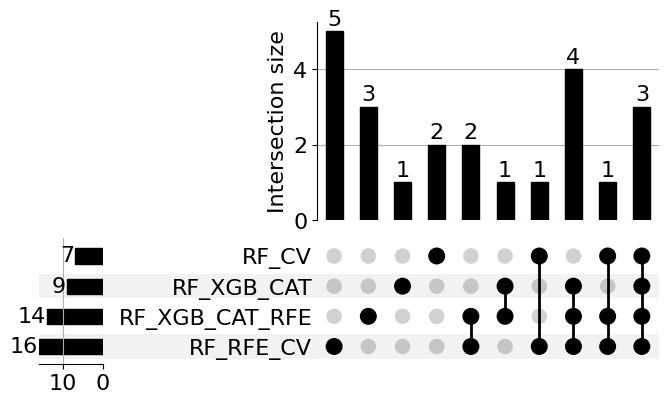

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import upsetplot

# Definindo cinco conjuntos de genes como listas (ou conjuntos)
genes_grupo1 = {'IMPDH1P8', 'H2AC14', 'DSEL', 'MYOSLID', 'MMP20', 'PLAAT1', 'ALDH3B1', 'COL9A3', 'GKN2'}
genes_grupo2 = {'IMPDH1P8', 'H2AC14', 'GCGR', 'C7', 'ONECUT3', 'MYOSLID', 'MMP20', 'PLAAT1', 'PCAT7', 'FTCD', 'ALDH3B1', 'COL9A3', 'GKN2', 'GSDMC'}
genes_grupo3 = {'ESCO2', 'C7', 'GABRP', 'MYOSLID', 'COL9A3', 'IMPDH1P8', 'NUS1P2'}
genes_grupo4 = {'H2AC14', 'ESCO2', 'ALG1L', 'C7', 'MMP20', 'GKN2', 'PLAAT1', 'MYOSLID', 'COL9A3', 'IMPDH1P8', 'ONECUT3', 'PCAT7', 'CSTL1', 'LINC02830', 'GINS2', 'HMGB3P6'}


# Criando um DataFrame para armazenar os genes e suas presenças nos grupos
todos_genes = list(genes_grupo1 | genes_grupo2 | genes_grupo3 | genes_grupo4)
tabela = pd.DataFrame(index=todos_genes)
tabela['RF_XGB_CAT'] = tabela.index.isin(genes_grupo1)
tabela['RF_XGB_CAT_RFE'] = tabela.index.isin(genes_grupo2)
tabela['RF_CV'] = tabela.index.isin(genes_grupo3)
tabela['RF_RFE_CV'] = tabela.index.isin(genes_grupo4)


# Encontrando a interseção entre os cinco grupos
genes_interseção_5_grupos = tabela[(tabela['RF_XGB_CAT']) &
                                   (tabela['RF_XGB_CAT_RFE']) &
                                   (tabela['RF_CV']) &
                                   (tabela['RF_RFE_CV'])].index.tolist()

print("Genes presentes em todos os 4 grupos:", genes_interseção_5_grupos)

# Contando as interseções para o UpSet plot
combinações = tabela.groupby(['RF_XGB_CAT', 'RF_XGB_CAT_RFE', 'RF_CV', 'RF_RFE_CV']).size()

# Plotando o UpSet plot
upsetplot.plot(combinações, orientation='horizontal', show_counts=True )
#plt.title("UpSet Plot of the Best Models")
plt.savefig("upset_plot2.svg", format='svg', dpi=300)
plt.show()

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import upsetplot

# Definindo cinco conjuntos de genes como listas (ou conjuntos)
genes_grupo1 = {'IMPDH1P8', 'H2AC14', 'DSEL', 'MYOSLID', 'MMP20', 'PLAAT1', 'ALDH3B1', 'COL9A3', 'GKN2'}
genes_grupo2 = {'IMPDH1P8', 'H2AC14', 'GCGR', 'C7', 'ONECUT3', 'MYOSLID', 'MMP20', 'PLAAT1', 'PCAT7', 'FTCD', 'ALDH3B1', 'COL9A3', 'GKN2', 'GSDMC'}
genes_grupo3 = {'ESCO2', 'C7', 'GABRP', 'MYOSLID', 'COL9A3', 'IMPDH1P8', 'NUS1P2'}
genes_grupo4 = {'H2AC14', 'ESCO2', 'ALG1L', 'C7', 'MMP20', 'GKN2', 'PLAAT1', 'MYOSLID', 'COL9A3', 'IMPDH1P8', 'ONECUT3', 'PCAT7', 'CSTL1', 'LINC02830', 'GINS2', 'HMGB3P6'}



# Combinar todos os grupos
todos_genes = genes_grupo1 | genes_grupo2 | genes_grupo3 | genes_grupo4

# Contagem de ocorrências por gene
from collections import Counter
contagem_genes = Counter(
    gene for grupo in [genes_grupo1, genes_grupo2, genes_grupo3, genes_grupo4] for gene in grupo
)

# Separar os genes por número de ocorrências
genes_por_frequencia = {i: [] for i in range(1, 6)}
for gene, frequencia in contagem_genes.items():
    genes_por_frequencia[frequencia].append(gene)

# Exibir resultados
for i in range(1, 6):
    print(f"Genes que aparecem em {i} grupo(s):")
    print(genes_por_frequencia[i])
    print(f"Número total: {len(genes_por_frequencia[i])}\n")

Genes que aparecem em 1 grupo(s):
['DSEL', 'FTCD', 'GSDMC', 'GCGR', 'NUS1P2', 'GABRP', 'GINS2', 'CSTL1', 'HMGB3P6', 'ALG1L', 'LINC02830']
Número total: 11

Genes que aparecem em 2 grupo(s):
['ALDH3B1', 'ONECUT3', 'PCAT7', 'ESCO2']
Número total: 4

Genes que aparecem em 3 grupo(s):
['MMP20', 'GKN2', 'H2AC14', 'PLAAT1', 'C7']
Número total: 5

Genes que aparecem em 4 grupo(s):
['IMPDH1P8', 'MYOSLID', 'COL9A3']
Número total: 3

Genes que aparecem em 5 grupo(s):
[]
Número total: 0

